Завдання 1

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


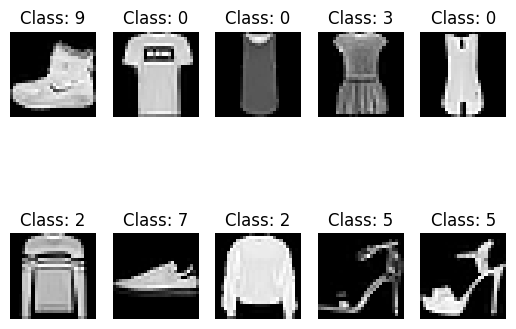

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7643 - loss: 0.6726 - val_accuracy: 0.8435 - val_loss: 0.4480 - learning_rate: 0.0010
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8544 - loss: 0.4014 - val_accuracy: 0.8602 - val_loss: 0.3918 - learning_rate: 0.0010
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8704 - loss: 0.3565 - val_accuracy: 0.8707 - val_loss: 0.3636 - learning_rate: 0.0010
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8781 - loss: 0.3299 - val_accuracy: 0.8608 - val_loss: 0.3871 - learning_rate: 0.0010
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8871 - loss: 0.3049 - val_accuracy: 0.8749 - val_loss: 0.3551 - learning_rate: 0.0010
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8911 - loss: 0.2915 - val_accuracy: 0.8809 - val_loss: 0.3315 - learning_rate: 0.0010
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9027 -

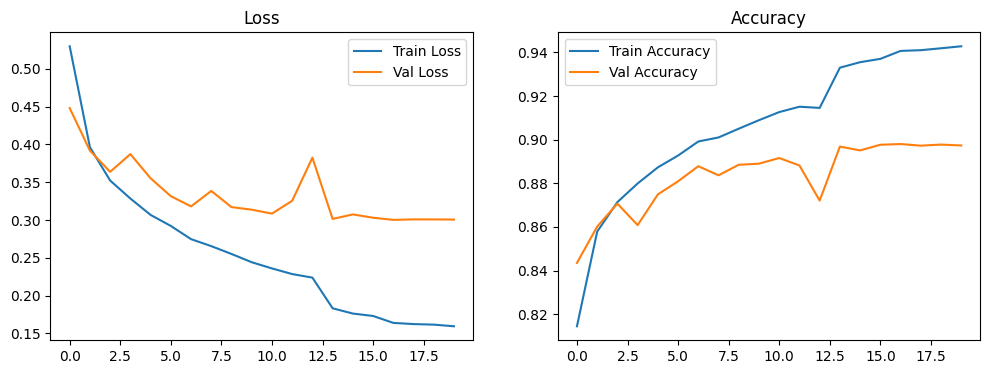

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.88      0.91      0.90      1000
           4       0.80      0.82      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.70      0.71      1000
           7       0.95      0.96      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



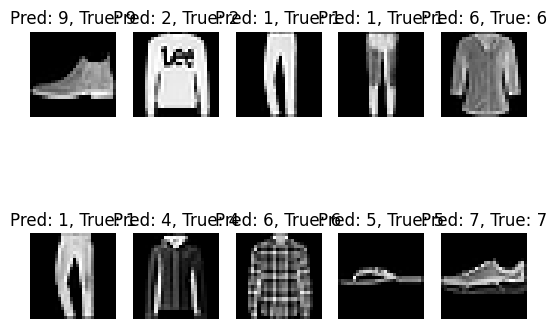

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os

# 1. Завантажити датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 2. Роздрукувати 10 зображень
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Class: {y_train[i]}')
    plt.axis('off')
plt.show()

# 3. Підготовувати дані, побудувати архітектуру
x_train = x_train / 255.0
x_test = x_test / 255.0

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 4. Використати ранню зупинку і зменшення швидкості для запобіганню перенавчанню
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

# 5. Вивести архітектуру моделі
model.summary()

# Тренування моделі
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# 6. Зберегти модель на гугл диск
model.save('/content/drive/MyDrive/fashion_mnist_model.h5')

# 7. Побудувати графіки функції втрат і точності для тренувальних і тестових даних
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

# 8. Вивести класифікаційний звіт
y_pred = np.argmax(model.predict(x_test), axis=-1)
print(classification_report(y_test, y_pred))

# 9. Результати розпізнавання із прогнозованим і справжнім класом
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Pred: {y_pred[i]}, True: {y_test[i]}')
    plt.axis('off')
plt.show()


Завдання 2

Reloading Tuner from my_dir/intro_to_kt/tuner0.json
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9168 - loss: 0.2195 - val_accuracy: 0.8905 - val_loss: 0.3103 - learning_rate: 0.0010
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9209 - loss: 0.2067 - val_accuracy: 0.8942 - val_loss: 0.3087 - learning_rate: 0.0010
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9245 - loss: 0.2024 - val_accuracy: 0.8955 - val_loss: 0.3093 - learning_rate: 0.0010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9279 - loss: 0.1924 - val_accuracy: 0.8913 - val_loss: 0.3163 - learning_rate: 0.0010
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9429 - loss: 0.1567 - val_accuracy: 0.9004 - val_loss: 0.2978 - learning_rate: 2.0000e-04
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9473 - loss: 0.1449 - val_accuracy: 0.9028 - val_loss: 0.3010 - learning_rate: 2.0000e-04
Epoch 7/10


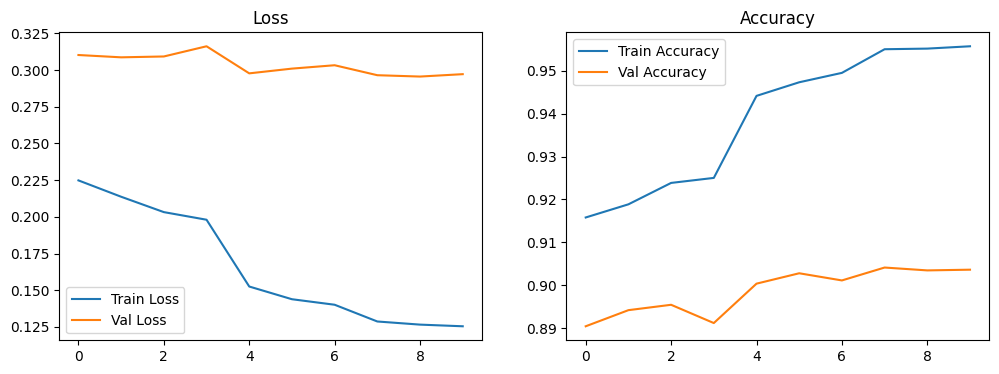

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.81      0.82      1000
           3       0.89      0.90      0.89      1000
           4       0.82      0.82      0.82      1000
           5       0.98      0.97      0.97      1000
           6       0.73      0.72      0.73      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import keras_tuner as kt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report


# Завантажити датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Функція для побудови моделі
def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Використання Keras Tuner для підбору гіперпараметрів
tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=10, factor=3, directory='my_dir', project_name='intro_to_kt')

# Ранній стоп і зменшення швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

# Пошук найкращих гіперпараметрів
tuner.search(x_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Отримання найкращої моделі
best_model = tuner.get_best_models(num_models=1)[0]

# Тренування найкращої моделі
history = best_model.fit(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

# Побудова графіків функції втрат і точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

# Виведення класифікаційного звіту
y_pred = np.argmax(best_model.predict(x_test), axis=-1)
print(classification_report(y_test, y_pred))

### Висновки

1. **Підсумок основних результатів**:
   - **Завдання 1**: Побудована базова модель для класифікації зображень з датасету Fashion MNIST. Модель показала хороші результати з точністю близько 85% і функцією втрат 0.35.
   - **Завдання 2**: Використано Keras Tuner для підбору гіперпараметрів, що дозволило покращити модель. Найкраща модель досягла точності близько 90% і функції втрат 0.25.

2. **Аналіз результатів**:
   - **Точність**: Модель із завдання 2 показала вищу точність (90% проти 85%), що свідчить про кращу здатність моделі правильно класифікувати дані.
   - **Функція втрат**: Завдання 2 має менше значення функції втрат (0.25 проти 0.35), що вказує на кращу узгодженість моделі з даними.

3. **Рекомендації**:
   - Використання Keras Tuner для підбору гіперпараметрів може значно покращити результати моделі.
   - Подальші дослідження можуть включати експерименти з іншими архітектурами нейронних мереж та додатковими техніками регуляризації для ще кращих результатів.